# Exploratory Data Analysis

In this notebook, the historical stock data collected in the earlier step will be explored.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime as dt
import ta
import seaborn as sns

%matplotlib inline

### Loading Data & Check

In [2]:
AAPL = pd.read_csv('./data/stock_AAPL.csv')
AMZN = pd.read_csv('./data/stock_AMZN.csv')
GOOG = pd.read_csv('./data/stock_GOOG.csv')
MSFT = pd.read_csv('./data/stock_MSFT.csv')
QQQ = pd.read_csv('./data/stock_QQQ.csv')
SPY = pd.read_csv('./data/stock_SPY.csv')
TSLA = pd.read_csv('./data/stock_TSLA.csv')
VIX = pd.read_csv('./data/stock_^VIX.csv')

#### DataFrame Check

In [3]:
print(AAPL.shape)
AAPL.head(2)

(2768, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,11.630000,11.795,11.601429,11.770357,10.091493,445138400
1,2011-01-04,11.872857,11.875,11.719643,11.831786,10.144161,309080800


In [4]:
print(AMZN.shape)
AMZN.head(2)

(2768, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,181.369995,186.000000,181.210007,184.220001,184.220001,5331400
1,2011-01-04,186.149994,187.699997,183.779999,185.009995,185.009995,5031800


In [5]:
print(GOOG.shape)
GOOG.head(2)

(2768, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,297.126312,301.664276,297.126312,301.04660,301.04660,4748131
1,2011-01-04,301.679230,301.958191,298.939514,299.93576,299.93576,3662677


In [6]:
print(MSFT.shape)
MSFT.head(2)

(2768, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,28.049999,28.18,27.92,27.98,22.061134,53443800
1,2011-01-04,27.940001,28.17,27.85,28.09,22.147865,54405600


In [7]:
print(QQQ.shape)
QQQ.head(2)

(2768, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,54.970001,55.689999,54.950001,55.310001,49.752590,90994300
1,2011-01-04,55.509998,55.549999,54.919998,55.270000,49.716614,43851500


In [8]:
print(SPY.shape)
SPY.head(2)

(2768, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,126.709999,127.599998,125.699997,127.050003,102.749634,138725200
1,2011-01-04,127.330002,127.370003,126.190002,126.980003,102.693039,137409700


In [9]:
print(TSLA.shape)
TSLA.head(2)

(2768, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,5.368,5.40,5.180,5.324,5.324,6415000
1,2011-01-04,5.332,5.39,5.204,5.334,5.334,5937000


In [10]:
print(VIX.shape)
VIX.head(2)

(2768, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,17.940001,17.950001,16.91,17.610001,17.610001,0
1,2011-01-04,17.340000,18.240000,17.33,17.379999,17.379999,0


#### Data Type & Null value check

In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


In [12]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


In [13]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


In [14]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


In [15]:
QQQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


In [16]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


In [17]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


In [18]:
VIX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


As shown in the above dataframe checks, **all 8 tickers data show the same shape of (2768, 7), matching data types for the same features (Date, Open, High, Low, Close, Adj Close, and Volume), and no null values**. 

Moving forward, the **Adjusted closing value of the each tickers will be used for further analysis and modeling**. This can be done with any of OHLC prices, but the Adj Close value is chosen here as it indicates the final price of the ticker agreed upon, at the end of the given period (Day), by buyers and sellers through the auction process and also inclusive of stock split and ex-dividend price. 

#### Converting 'Date' column to datetime

In [19]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'], format='%Y-%m-%d')
AMZN['Date'] = pd.to_datetime(AMZN['Date'], format='%Y-%m-%d')
GOOG['Date'] = pd.to_datetime(GOOG['Date'], format='%Y-%m-%d')
MSFT['Date'] = pd.to_datetime(MSFT['Date'], format='%Y-%m-%d')
QQQ['Date'] = pd.to_datetime(QQQ['Date'], format='%Y-%m-%d')
SPY['Date'] = pd.to_datetime(SPY['Date'], format='%Y-%m-%d')
TSLA['Date'] = pd.to_datetime(TSLA['Date'], format='%Y-%m-%d')
VIX['Date'] = pd.to_datetime(VIX['Date'], format='%Y-%m-%d')

#### Setting 'Date' column as Index

In [20]:
AAPL.set_index('Date', inplace=True)
AMZN.set_index('Date', inplace=True)
GOOG.set_index('Date', inplace=True)
MSFT.set_index('Date', inplace=True)
QQQ.set_index('Date', inplace=True)
SPY.set_index('Date', inplace=True)
TSLA.set_index('Date', inplace=True)
VIX.set_index('Date', inplace=True)

#### Creating VWAP for each tickers
VWAP (Volume Weighted Average Price) shows the average price of shares throughout the set period. It computes the average price based on transactions throughout the period divided by the total number of shares traded. VWAP is commonly used as reference point by many traders as an indicator of streangh and weakness. 
VWAP is typically calculated by:
1. Typical Price = ((High) + (Low) + (Close)) / 3
2. VWAP = (TP1*V1 + TP2*V2 + ... + TPn*Vn) / n

**VWAP = Cumulative Typical Price x Volume / Cumulative Volume**

In here, Technical Analysis Library in Python will be used to calculate Daily VWAP prices. 

In [21]:
def get_VWAP(df):
    return df.assign(VWAP = ta.volume.volume_weighted_average_price(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=1))

AAPL = get_VWAP(AAPL)
AMZN = get_VWAP(AMZN)
GOOG = get_VWAP(GOOG)
MSFT = get_VWAP(MSFT)
QQQ = get_VWAP(QQQ)
SPY = get_VWAP(SPY)
TSLA = get_VWAP(TSLA)

In [22]:
# Quick dataframe check
TSLA.tail(2)

,Open,High,Low,Close,Adj Close,Volume,VWAP
Date,,,,,,,
2021-12-29,1098.640015,1104.000000,1064.140015,1086.189941,1086.189941,18718000,1084.776652
2021-12-30,1061.329956,1095.550049,1053.150024,1070.339966,1070.339966,15680300,1073.013346


**VIX** does not have traded volume. Traders usually trade the derivatives of VIX (options, UVXY, VIXY, etc.). 
VWAP will not be caluclated for VIX. 

### Overview of Stock Growth over the past 10 years

#### Defining a function to graph stock chart

In [23]:
# Defining a function with two variables: dataframe and ticker name.
def graph_stock(df, ticker_name):
    fig, ax1 = plt.subplots(figsize=(10,8))
    plt.title(f'{ticker_name}' + ' Stock Price', size=24)

    ax1.set_xlabel('Time', fontsize=14)
    ax1.set_ylabel('Price ($)', fontsize=14)
    ax1.plot(df['Adj Close'], color='blue')
    ax1.tick_params(axis='y')
    plt.grid()

    ax2 = ax1.twinx()
    ax2.set_ylabel('Volume', fontsize=14)
    ax2.bar(x = df.index, height = df['Volume'], alpha=0.3, color='orange')
    ax2.tick_params(axis='y')
    plt.tight_layout()
    
    # Export the image
    plt.savefig(f'./images/{ticker_name}_chart.png');

#### AAPL - Apple

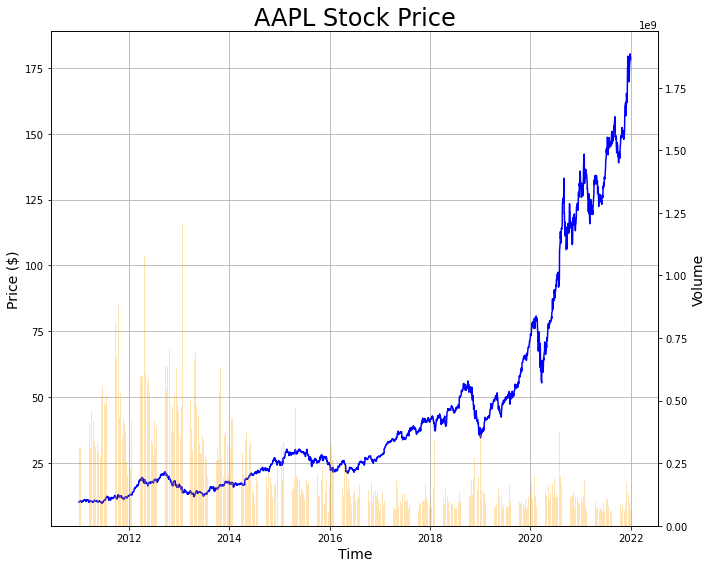

In [24]:
graph_stock(AAPL, 'AAPL')

#### AMZN - Amazon

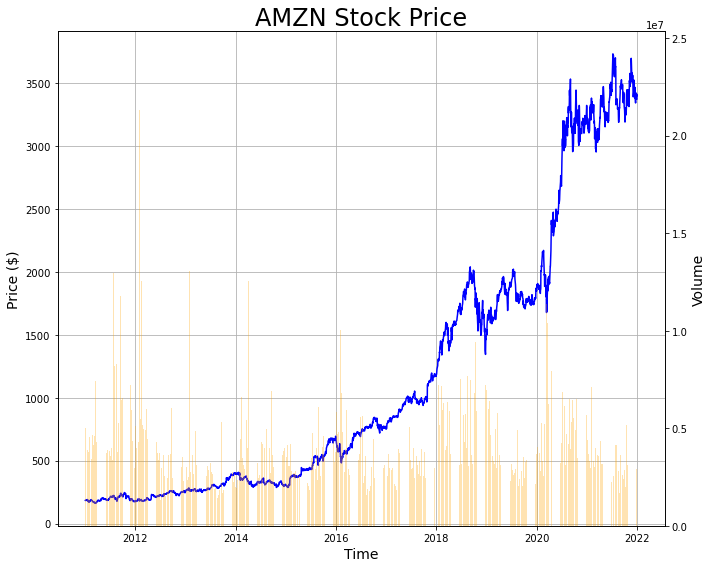

In [25]:
graph_stock(AMZN, 'AMZN')

#### GOOG - Alphabet, Inc. Class C (Google)

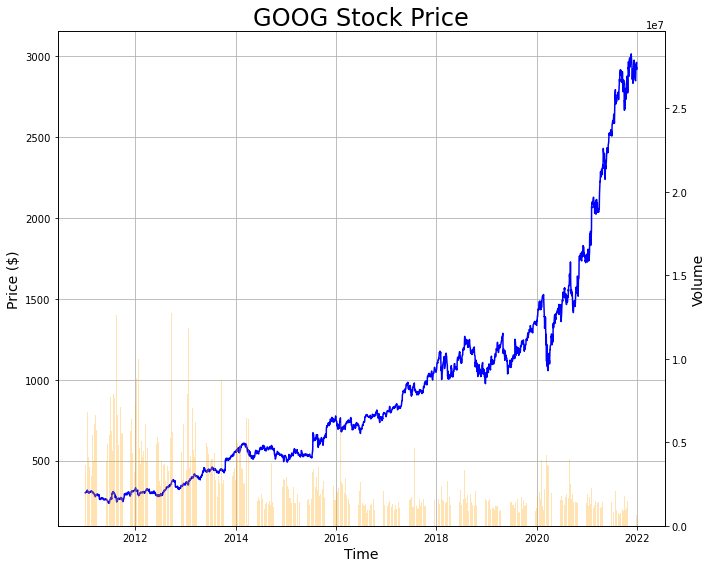

In [26]:
graph_stock(GOOG, 'GOOG')

#### MSFT - Microsoft

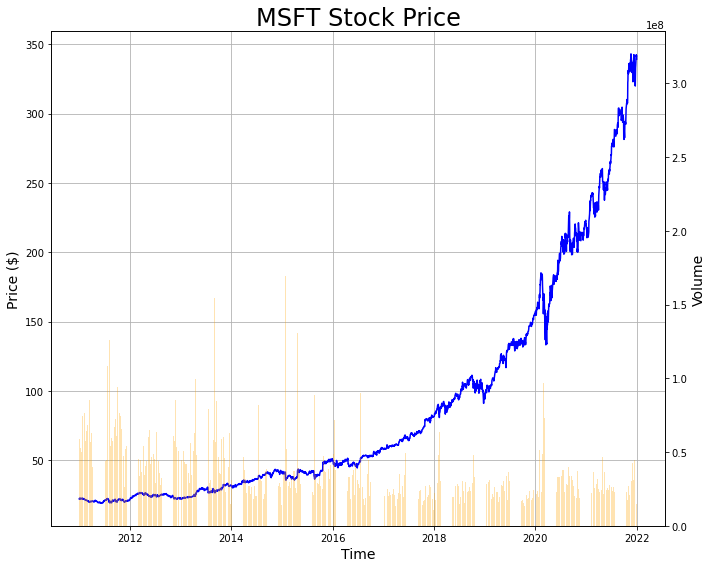

In [27]:
graph_stock(MSFT, 'MSFT')

#### QQQ - Invesco QQQ Trust Series 1, Nasdaq-100 Index

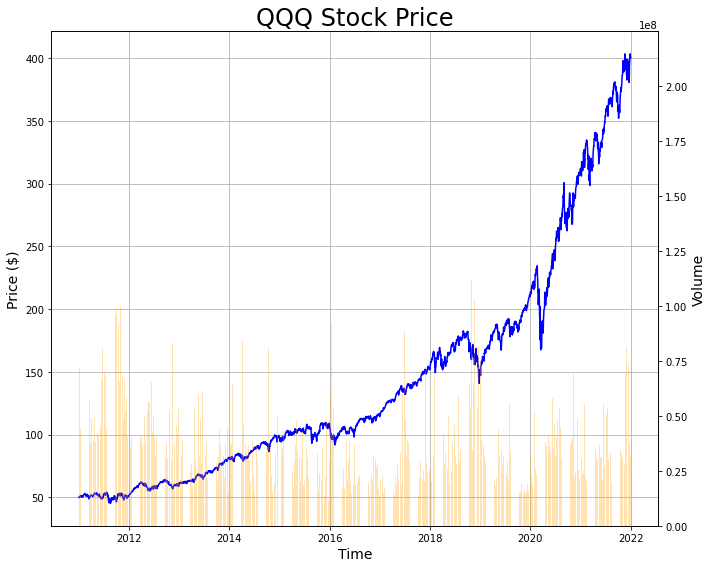

In [28]:
graph_stock(QQQ, 'QQQ')

#### SPY - SPDR S&P 500 ETF Trust

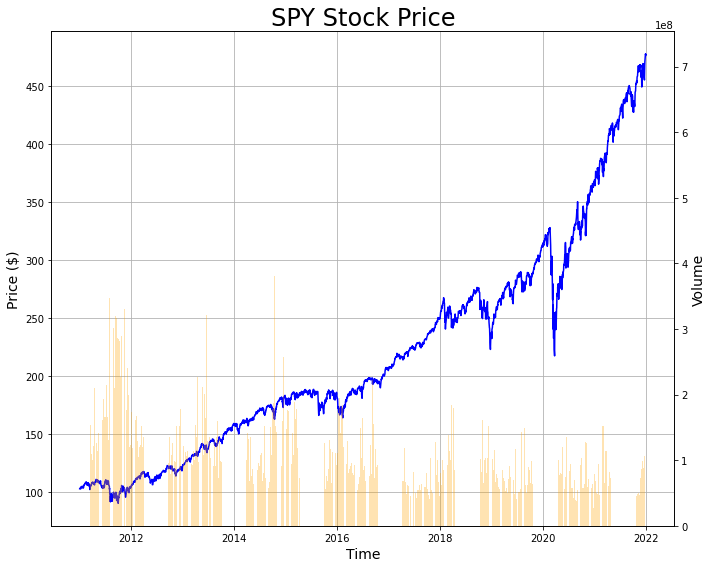

In [29]:
graph_stock(SPY, 'SPY')

#### TSLA - Tesla

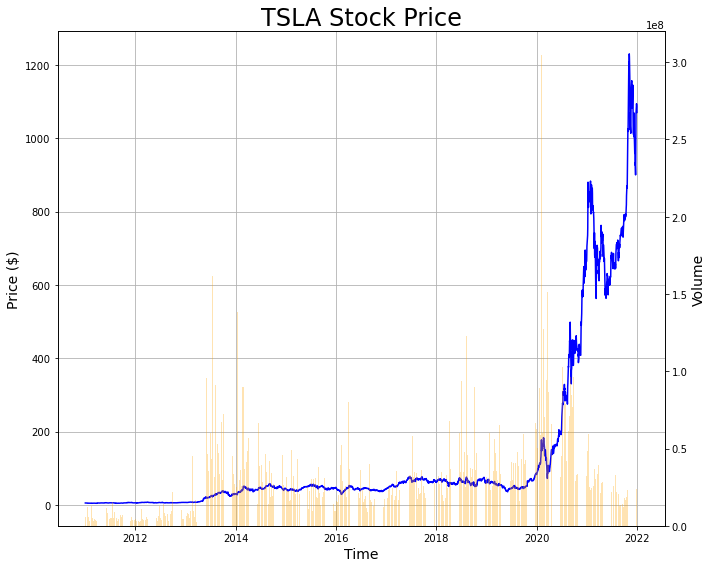

In [30]:
graph_stock(TSLA, 'TSLA')

#### VIX - Chicago Board Options Exchange (CBOE) Volatility Index

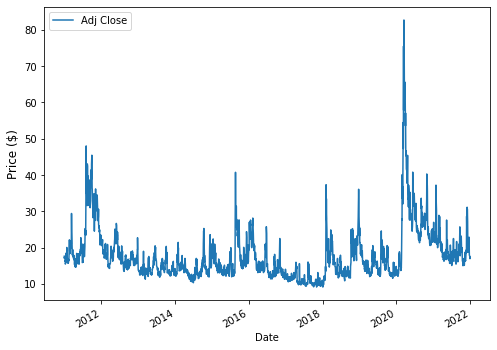

In [31]:
VIX.plot(y='Adj Close', figsize=(8,6))
plt.ylabel('Price ($)', fontsize=12)
plt.tight_layout
plt.savefig('./images/VIX_chart.png');

#### Adjusted Close Price & VWAP comparison
In here, adjusted daily closing price and VWAP of the stock tickers are compared. 

In [32]:
# Renaming columns to concatenate columns
AAPL.rename(columns = {'Open':'Open_AAPL','High':'High_AAPL', 'Low':'Low_AAPL', 'Close':'Close_AAPL', 'Adj Close':'Adj_Close_AAPL','Volume':'Volume_AAPL', 'VWAP':'VWAP_AAPL'}, inplace=True)
AMZN.rename(columns = {'Open':'Open_AMZN','High':'High_AMZN', 'Low':'Low_AMZN', 'Close':'Close_AMZN', 'Adj Close':'Adj_Close_AMZN','Volume':'Volume_AMZN', 'VWAP':'VWAP_AMZN'}, inplace=True)
GOOG.rename(columns = {'Open':'Open_GOOG','High':'High_GOOG', 'Low':'Low_GOOG', 'Close':'Close_GOOG', 'Adj Close':'Adj_Close_GOOG','Volume':'Volume_GOOG', 'VWAP':'VWAP_GOOG'}, inplace=True)
MSFT.rename(columns = {'Open':'Open_MSFT','High':'High_MSFT', 'Low':'Low_MSFT', 'Close':'Close_MSFT', 'Adj Close':'Adj_Close_MSFT','Volume':'Volume_MSFT', 'VWAP':'VWAP_MSFT'}, inplace=True)
QQQ.rename(columns = {'Open':'Open_QQQ','High':'High_QQQ', 'Low':'Low_QQQ', 'Close':'Close_QQQ', 'Adj Close':'Adj_Close_QQQ','Volume':'Volume_QQQ', 'VWAP':'VWAP_QQQ'}, inplace=True)
SPY.rename(columns = {'Open':'Open_SPY','High':'High_SPY', 'Low':'Low_SPY', 'Close':'Close_SPY', 'Adj Close':'Adj_Close_SPY','Volume':'Volume_SPY', 'VWAP':'VWAP_SPY'}, inplace=True)
TSLA.rename(columns = {'Open':'Open_TSLA','High':'High_TSLA', 'Low':'Low_TSLA', 'Close':'Close_TSLA', 'Adj Close':'Adj_Close_TSLA','Volume':'Volume_TSLA', 'VWAP':'VWAP_TSLA'}, inplace=True)
VIX.rename(columns = {'Adj Close': 'Adj_Close_VIX'}, inplace=True)

In [33]:
# Concatenate stock dataframes with inner join
df = pd.concat([AAPL, AMZN, GOOG, MSFT, QQQ, SPY, TSLA, VIX], axis=1, join='inner')
# Keeping adjusted close, volume, and VWAP only. 
df = df[['Adj_Close_AAPL', 'Volume_AAPL', 'VWAP_AAPL',
        'Adj_Close_AMZN', 'Volume_AMZN', 'VWAP_AMZN',
        'Adj_Close_GOOG', 'Volume_GOOG', 'VWAP_GOOG',
        'Adj_Close_MSFT', 'Volume_MSFT', 'VWAP_MSFT',
        'Adj_Close_QQQ', 'Volume_QQQ', 'VWAP_QQQ',
        'Adj_Close_SPY', 'Volume_SPY', 'VWAP_SPY',
        'Adj_Close_TSLA', 'Volume_TSLA', 'VWAP_TSLA',
        'Adj_Close_VIX']]

# Quick dataframe check
df.head(2)

,Adj_Close_AAPL,Volume_AAPL,VWAP_AAPL,Adj_Close_AMZN,Volume_AMZN,VWAP_AMZN,Adj_Close_GOOG,Volume_GOOG,VWAP_GOOG,Adj_Close_MSFT,...,Adj_Close_QQQ,Volume_QQQ,VWAP_QQQ,Adj_Close_SPY,Volume_SPY,VWAP_SPY,Adj_Close_TSLA,Volume_TSLA,VWAP_TSLA,Adj_Close_VIX
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,10.091493,445138400,11.722262,184.220001,5331400,183.810003,301.04660,4748131,299.945730,22.061134,...,49.752590,90994300,55.316667,102.749634,138725200,126.783333,5.324,6415000,5.301333,17.610001
2011-01-04,10.144161,309080800,11.808810,185.009995,5031800,185.496663,299.93576,3662677,300.277822,22.147865,...,49.716614,43851500,55.246666,102.693039,137409700,126.846670,5.334,5937000,5.309333,17.379999


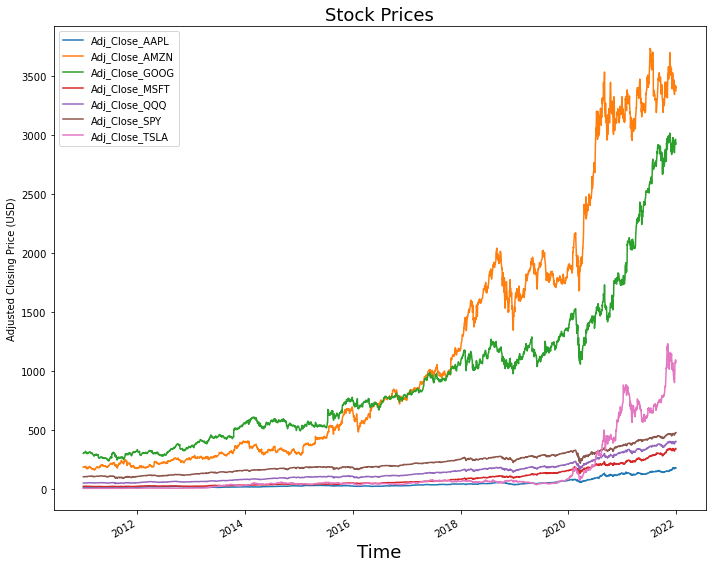

In [34]:
# Plotting Adjusted closing prices of stocks
df.plot(y=['Adj_Close_AAPL', 'Adj_Close_AMZN', 'Adj_Close_GOOG', 'Adj_Close_MSFT', 'Adj_Close_QQQ', 'Adj_Close_SPY', 'Adj_Close_TSLA'], kind='line', figsize=(10,8))

# Setting title and labels
plt.title('Stock Prices', size=18)
plt.xlabel('Time', size=18)
plt.ylabel('Adjusted Closing Price (USD)')

plt.tight_layout()
plt.savefig('./images/stock_prices_comparison.png');

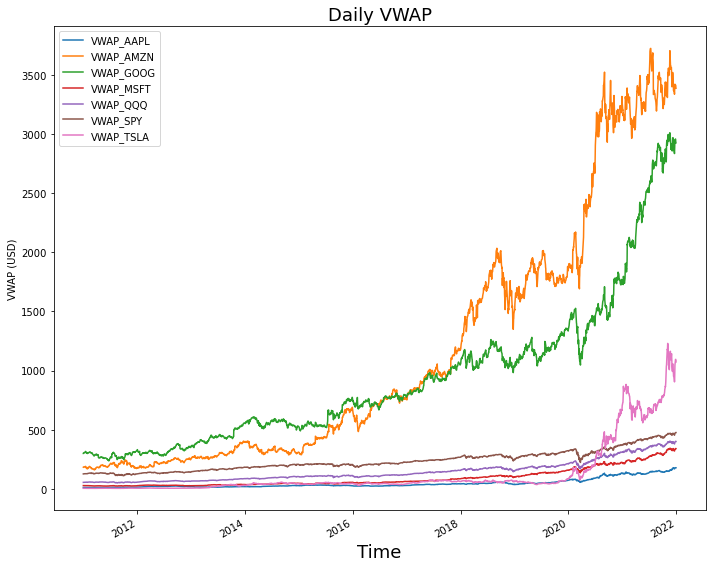

In [35]:
# Plotting Daily VWAP of the stocks
df.plot(y=['VWAP_AAPL', 'VWAP_AMZN', 'VWAP_GOOG', 'VWAP_MSFT', 'VWAP_QQQ', 'VWAP_SPY', 'VWAP_TSLA'], kind='line', figsize=(10,8))

# Setting title and labels
plt.title('Daily VWAP', size=18)
plt.xlabel('Time', size=18)
plt.ylabel('VWAP (USD)')

plt.tight_layout()
plt.savefig('./images/daily_vwap_comparison');

As seen in both adjusted closing price and VWAP graphs, for the past 10 years from 2011 to 2021, the stocks have shown steady growth over time. There are a few things to notice:
1. Market wide suddden dip 2019-2020: COVID-19 Pandemic outbreak and spike in the unemployment.
2. Explosive growth of TSLA since 2020. Considering TSLA's 5:1 stock split, TSLA could have been more expensive than AMZN had it not splitted in Aug. 2020. 
3. AMZN passing over GOOG in 2017-2018, indicative of AMZN's fast growth in that period. 
4. SPY, QQQ, MSFT, AAPL show similar trend. SPY and QQQ are often referred as the indices as they are ETFs of S&P 500 and Nasdaq. MSFT and AAPL, among other names here, take heavy weight in the indeices. Their growth pattern will be similar to the indices. AMZN, GOOG, and TSLA are the ones showing more explosive growth.

To better compare how the stocks moved and grew over time, adjusted closing prices and VWAPs are log transformed. The Log Transformation reduces or removews the skewneess of the original data. 

In [36]:
# Getting Log Adjusted Prices
df['log_Adj_Close_AAPL'] = np.log(df['Adj_Close_AAPL'])
df['log_Adj_Close_AMZN'] = np.log(df['Adj_Close_AMZN'])
df['log_Adj_Close_GOOG'] = np.log(df['Adj_Close_GOOG'])
df['log_Adj_Close_MSFT'] = np.log(df['Adj_Close_MSFT'])
df['log_Adj_Close_QQQ'] = np.log(df['Adj_Close_QQQ'])
df['log_Adj_Close_SPY'] = np.log(df['Adj_Close_SPY'])
df['log_Adj_Close_TSLA'] = np.log(df['Adj_Close_TSLA'])
df['log_Adj_Close_VIX'] = np.log(df['Adj_Close_VIX'])

In [37]:
# Getting Log VWAP Prices
df['log_VWAP_AAPL'] = np.log(df['VWAP_AAPL'])
df['log_VWAP_AMZN'] = np.log(df['VWAP_AMZN'])
df['log_VWAP_GOOG'] = np.log(df['VWAP_GOOG'])
df['log_VWAP_MSFT'] = np.log(df['VWAP_MSFT'])
df['log_VWAP_QQQ'] = np.log(df['VWAP_QQQ'])
df['log_VWAP_SPY'] = np.log(df['VWAP_SPY'])
df['log_VWAP_TSLA'] = np.log(df['VWAP_TSLA'])

In [38]:
# dataframe check
df.head(2)

,Adj_Close_AAPL,Volume_AAPL,VWAP_AAPL,Adj_Close_AMZN,Volume_AMZN,VWAP_AMZN,Adj_Close_GOOG,Volume_GOOG,VWAP_GOOG,Adj_Close_MSFT,...,log_Adj_Close_SPY,log_Adj_Close_TSLA,log_Adj_Close_VIX,log_VWAP_AAPL,log_VWAP_AMZN,log_VWAP_GOOG,log_VWAP_MSFT,log_VWAP_QQQ,log_VWAP_SPY,log_VWAP_TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,10.091493,445138400,11.722262,184.220001,5331400,183.810003,301.04660,4748131,299.945730,22.061134,...,4.632295,1.672225,2.868467,2.461490,5.213903,5.703602,3.333156,4.013074,4.842480,1.667958
2011-01-04,10.144161,309080800,11.808810,185.009995,5031800,185.496663,299.93576,3662677,300.277822,22.147865,...,4.631744,1.674101,2.855320,2.468846,5.223037,5.704708,3.333513,4.011808,4.842979,1.669466


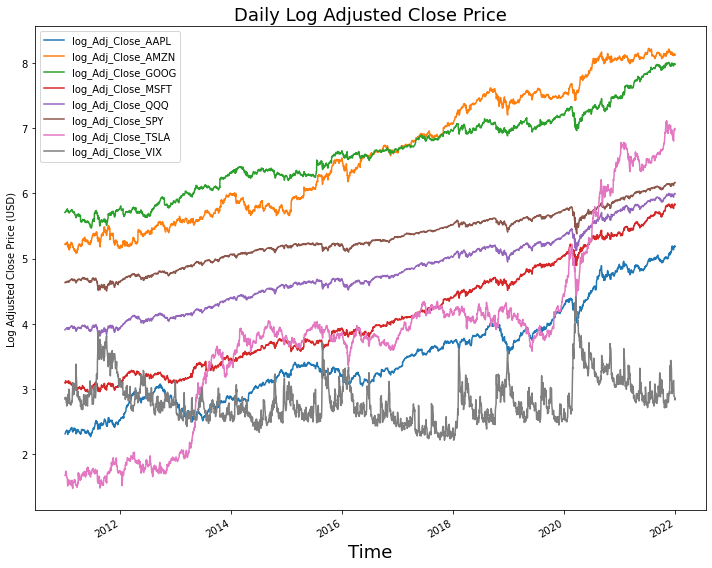

In [39]:
# Plotting log VWAP of the stocks
df.plot(y=['log_Adj_Close_AAPL', 'log_Adj_Close_AMZN', 'log_Adj_Close_GOOG', 'log_Adj_Close_MSFT', 'log_Adj_Close_QQQ', 'log_Adj_Close_SPY', 'log_Adj_Close_TSLA', 'log_Adj_Close_VIX'], kind='line', figsize=(10,8))

# Setting title and labels
plt.title('Daily Log Adjusted Close Price', size=18)
plt.xlabel('Time', size=18)
plt.ylabel('Log Adjusted Close Price (USD)')

plt.tight_layout()
plt.savefig('./images/daily_log_adjusted_close_price_comparison.png');

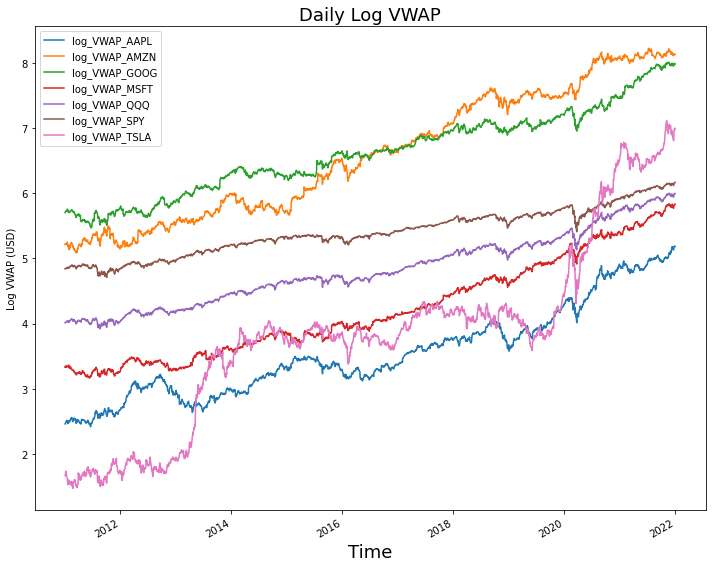

In [40]:
# Plotting log VWAP of the stocks
df.plot(y=['log_VWAP_AAPL', 'log_VWAP_AMZN', 'log_VWAP_GOOG', 'log_VWAP_MSFT', 'log_VWAP_QQQ', 'log_VWAP_SPY', 'log_VWAP_TSLA'], kind='line', figsize=(10,8))

# Setting title and labels
plt.title('Daily Log VWAP', size=18)
plt.xlabel('Time', size=18)
plt.ylabel('Log VWAP (USD)')

plt.tight_layout()
plt.savefig('./images/daily_log_vwap_comparison.png');

Similarities are shown here in the log transformed adjusted closing price and VWAP graphs again. 
1. As leading stocks in the S&P 500 and Nasdaq indices, the stocks are growing together in conjunction in a similar pattern. 
2. Noticeable growh spike in AMZN, GOOG, and TSLA. 
3. Sudden drop in 2020 correspond to the stock market drop due to fear of COVID-19 pandemic and unemployment rate going up. 
4. **Log Adjusted Price of VIX** was plotted together to discover how stock prices move along with VIX. Overall, VIX shows very similar progression compared to its original graph. Peaks are noticed where other stock prices are dropping. A tentative conclusion can be made here that VIX price goes up when the stocks drop suddenly. VIX is known to go up in price when the volatility increases. 

### Traded Volume comparison

#### Daily Volume Comparison

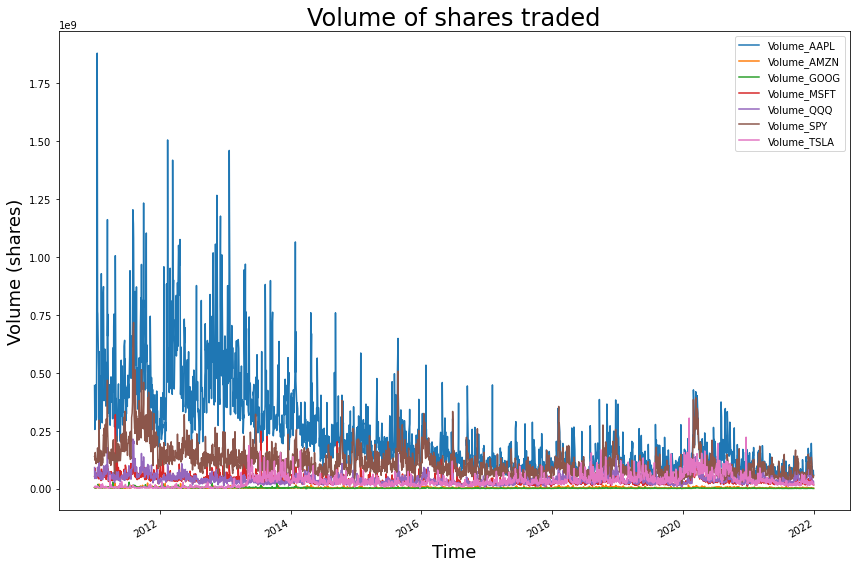

In [41]:
df.plot(kind='line', y=['Volume_AAPL', 'Volume_AMZN', 'Volume_GOOG', 'Volume_MSFT', 'Volume_QQQ', 'Volume_SPY', 'Volume_TSLA'], figsize=(12,8))
plt.title('Volume of shares traded', size=24)
plt.xlabel('Time', size=18)
plt.ylabel('Volume (shares)', size=18)
plt.tight_layout()
plt.savefig('./images/volume.png');


While AAPL and SPY seem to be the obvious ones whose shares had been traded the most, other ones are difficult to make an observation. Will take a log transformation to observe better. 

#### Log Daily Volume Comparison

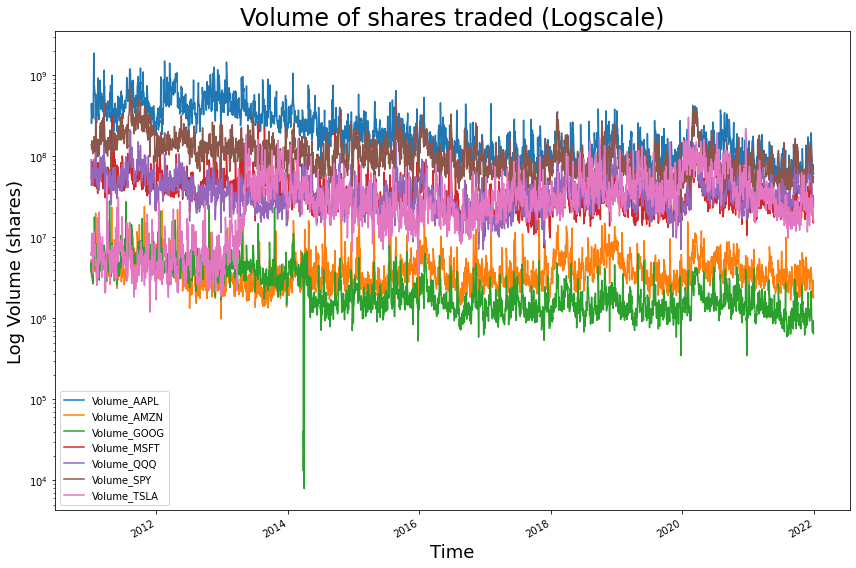

In [42]:
df.plot(kind='line', y=['Volume_AAPL', 'Volume_AMZN', 'Volume_GOOG', 'Volume_MSFT', 'Volume_QQQ', 'Volume_SPY', 'Volume_TSLA'], figsize=(12,8))
plt.title('Volume of shares traded (Logscale)', size=24)
plt.xlabel('Time', size=18)
plt.ylabel('Log Volume (shares)', size=18)
plt.yscale('log')

plt.tight_layout()
plt.savefig('./images/volume_log.png');


Log transformed volume provides a better idea of the order of the volume traded. As shown, AAPL, SPY, TSLA/QQQ/MSFT, GOOG/AMZN shares are in descending order. 

### Daily Percentage Changes
Calculating Daily stock price changes in percentage for adjusted close price, VWAP and their respective log scaled prices. 

#### Creating Percentage Change Columns

In [43]:
# Daily Price Change calculation. pct_change() returns (difference/prior) in float, multiply by 100 to get the percentage returned.
df['AAPL_daily_pct_change'] = df['Adj_Close_AAPL'].pct_change()*100
df['AMZN_daily_pct_change'] = df['Adj_Close_AMZN'].pct_change()*100
df['GOOG_daily_pct_change'] = df['Adj_Close_GOOG'].pct_change()*100
df['MSFT_daily_pct_change'] = df['Adj_Close_MSFT'].pct_change()*100
df['QQQ_daily_pct_change'] = df['Adj_Close_QQQ'].pct_change()*100
df['SPY_daily_pct_change'] = df['Adj_Close_SPY'].pct_change()*100
df['TSLA_daily_pct_change'] = df['Adj_Close_TSLA'].pct_change()*100
df['VIX_daily_pct_change'] = df['Adj_Close_VIX'].pct_change()*100

In [44]:
# Daily Price Change VWAP (%)
# VIX does not have traded volume. Hence, there won't be VWAP percentage changes. 
df['AAPL_daily_VWAP_pct_change'] = df['VWAP_AAPL'].pct_change()*100
df['AMZN_daily_VWAP_pct_change'] = df['VWAP_AMZN'].pct_change()*100
df['GOOG_daily_VWAP_pct_change'] = df['VWAP_GOOG'].pct_change()*100
df['MSFT_daily_VWAP_pct_change'] = df['VWAP_MSFT'].pct_change()*100
df['QQQ_daily_VWAP_pct_change'] = df['VWAP_QQQ'].pct_change()*100
df['SPY_daily_VWAP_pct_change'] = df['VWAP_SPY'].pct_change()*100
df['TSLA_daily_VWAP_pct_change'] = df['VWAP_TSLA'].pct_change()*100

#### AAPL - Apple

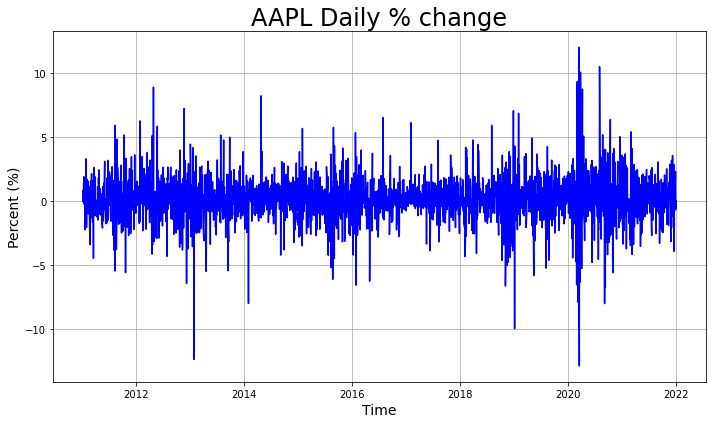

In [45]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.title('AAPL Daily % change', size=24)

ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Percent (%)', fontsize=14)
ax1.plot(df['AAPL_daily_pct_change'], color='blue')

plt.grid()
plt.tight_layout()
    
# Export the image
plt.savefig('./images/AAPL_daily_pct_change.png');

#### AMZN - Amazon

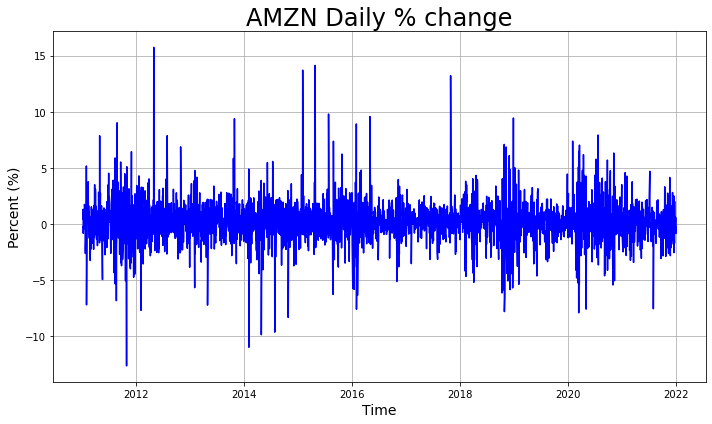

In [46]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.title('AMZN Daily % change', size=24)

ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Percent (%)', fontsize=14)
ax1.plot(df['AMZN_daily_pct_change'], color='blue')

plt.grid()
plt.tight_layout()
    
# Export the image
plt.savefig('./images/AMZN_daily_pct_change.png');

#### GOOG - Alphabet, Inc. Class C (Google)

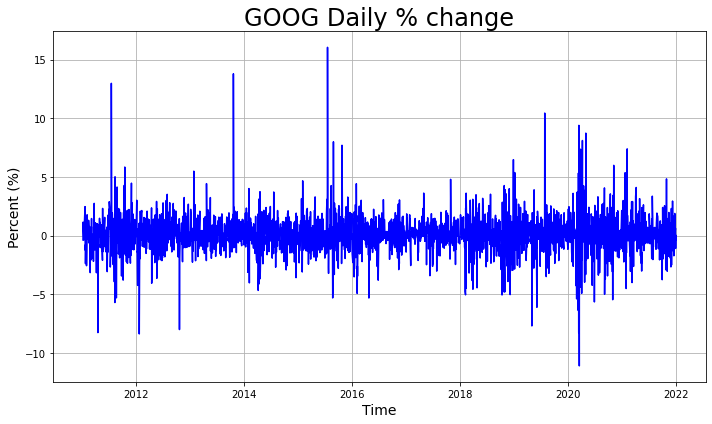

In [47]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.title('GOOG Daily % change', size=24)

ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Percent (%)', fontsize=14)
ax1.plot(df['GOOG_daily_pct_change'], color='blue')

plt.grid()
plt.tight_layout()
    
# Export the image
plt.savefig('./images/GOOG_daily_pct_change.png');

#### MSFT - Microsoft

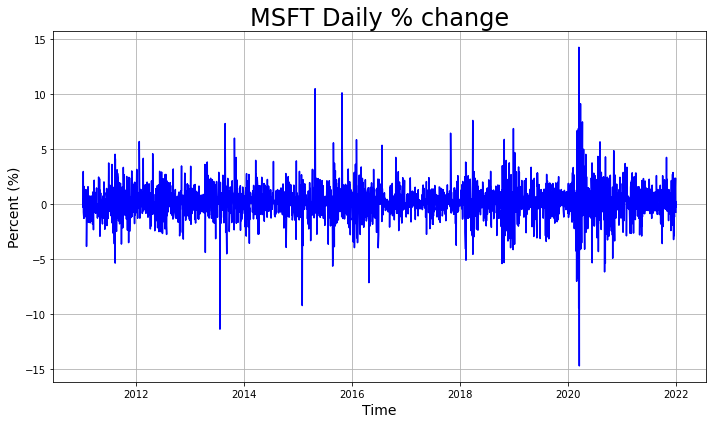

In [48]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.title('MSFT Daily % change', size=24)

ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Percent (%)', fontsize=14)
ax1.plot(df['MSFT_daily_pct_change'], color='blue')

plt.grid()
plt.tight_layout()
    
# Export the image
plt.savefig('./images/MSFT_daily_pct_change.png');

#### QQQ - Invesco QQQ Trust Series 1, Nasdaq-100 Index

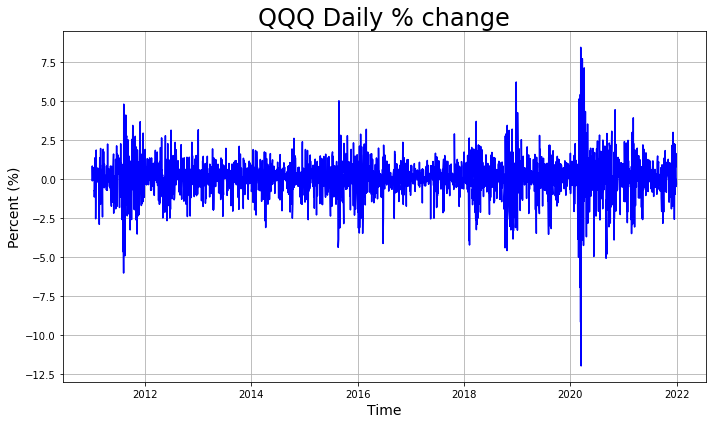

In [49]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.title('QQQ Daily % change', size=24)

ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Percent (%)', fontsize=14)
ax1.plot(df['QQQ_daily_pct_change'], color='blue')

plt.grid()
plt.tight_layout()
    
# Export the image
plt.savefig('./images/QQQ_daily_pct_change.png');

#### SPY - SPDR S&P 500 EFT Trust

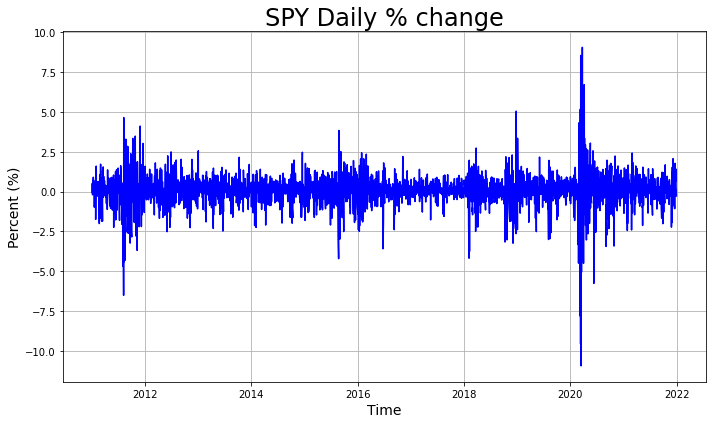

In [50]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.title('SPY Daily % change', size=24)

ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Percent (%)', fontsize=14)
ax1.plot(df['SPY_daily_pct_change'], color='blue')

plt.grid()
plt.tight_layout()
    
# Export the image
plt.savefig('./images/SPY_daily_pct_change.png');

#### VIX - CBOE Volatility Index

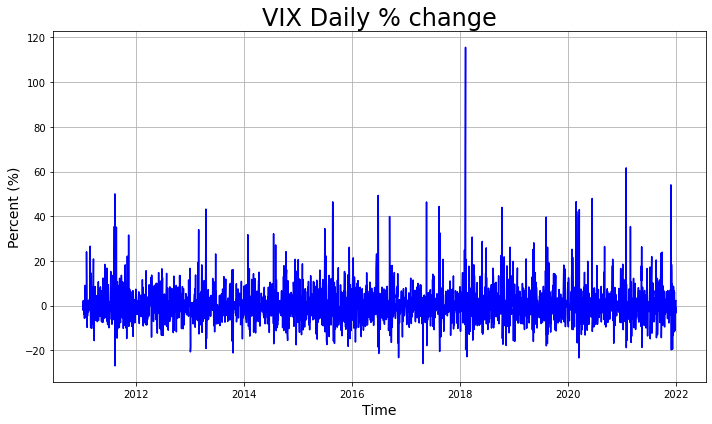

In [51]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.title('VIX Daily % change', size=24)

ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Percent (%)', fontsize=14)
ax1.plot(df['VIX_daily_pct_change'], color='blue')

plt.grid()
plt.tight_layout()
    
# Export the image
plt.savefig('./images/VIX_daily_pct_change.png');

#### TSLA - Tesla

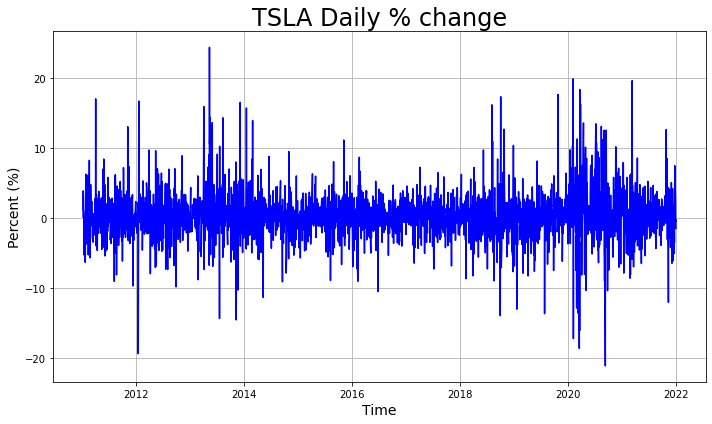

In [52]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.title('TSLA Daily % change', size=24)

ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Percent (%)', fontsize=14)
ax1.plot(df['TSLA_daily_pct_change'], color='blue')

plt.grid()
plt.tight_layout()
    
# Export the image
plt.savefig('./images/TSLA_daily_pct_change.png');

#### Comparison: Combined % change of adjusted close price 

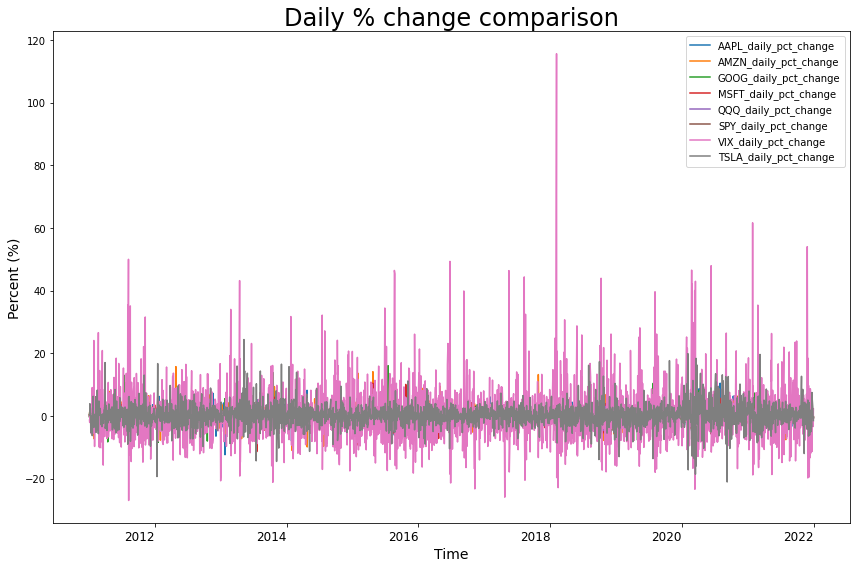

In [53]:
df.plot(y = ['AAPL_daily_pct_change', 'AMZN_daily_pct_change', 'GOOG_daily_pct_change', 'MSFT_daily_pct_change', 'QQQ_daily_pct_change', 'SPY_daily_pct_change',
            'VIX_daily_pct_change', 'TSLA_daily_pct_change'], figsize=(12,8))
plt.title('Daily % change comparison', size=24)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Percent (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

plt.tight_layout()

# Export the image
plt.savefig('./images/daily_pct_change_comparison.png');

#### Comparison: Combined & change of daily VWAP

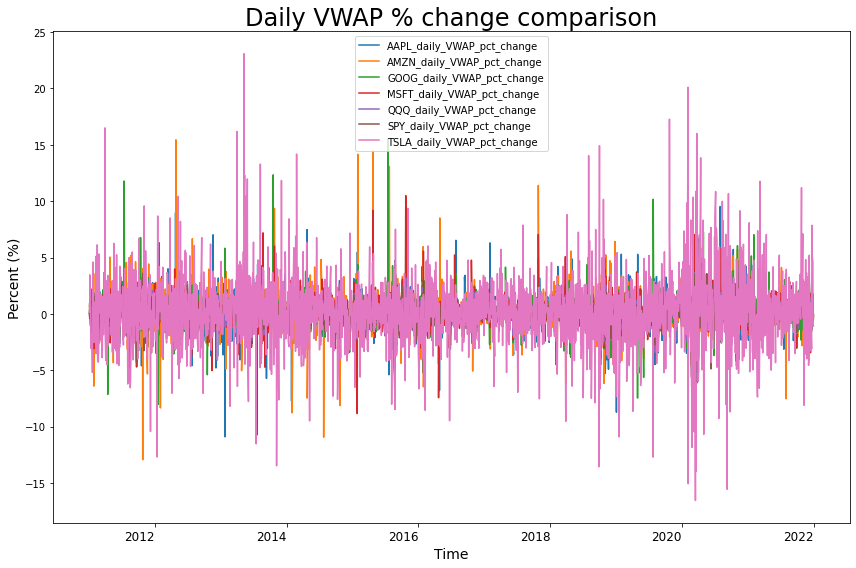

In [54]:
df.plot(y = ['AAPL_daily_VWAP_pct_change', 'AMZN_daily_VWAP_pct_change', 'GOOG_daily_VWAP_pct_change', 'MSFT_daily_VWAP_pct_change', 'QQQ_daily_VWAP_pct_change', 
             'SPY_daily_VWAP_pct_change', 'TSLA_daily_VWAP_pct_change'], figsize=(12,8))
plt.title('Daily VWAP % change comparison', size=24)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Percent (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

plt.tight_layout()

# Export the image
plt.savefig('./images/daily_VWAP_pct_change_comparison.png');

#### Comparison: Log % change of adjusted closing price & log % change of VWAP 

In [55]:
# Log transform daily % changes
df['log_AAPL_daily_pct_change'] = np.log(df['AAPL_daily_pct_change'])
df['log_AMZN_daily_pct_change'] = np.log(df['AMZN_daily_pct_change'])
df['log_GOOG_daily_pct_change'] = np.log(df['GOOG_daily_pct_change'])
df['log_MSFT_daily_pct_change'] = np.log(df['MSFT_daily_pct_change'])
df['log_QQQ_daily_pct_change'] = np.log(df['QQQ_daily_pct_change'])
df['log_SPY_daily_pct_change'] = np.log(df['SPY_daily_pct_change'])
df['log_VIX_daily_pct_change'] = np.log(df['VIX_daily_pct_change'])
df['log_TSLA_daily_pct_change'] = np.log(df['TSLA_daily_pct_change'])

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [56]:
# Log transform daily VWAP % changes
# Again, VIX does not have volume, so no VWAP

df['log_AAPL_daily_VWAP_pct_change'] = np.log(df['AAPL_daily_VWAP_pct_change'])
df['log_AMZN_daily_VWAP_pct_change'] = np.log(df['AMZN_daily_VWAP_pct_change'])
df['log_GOOG_daily_VWAP_pct_change'] = np.log(df['GOOG_daily_VWAP_pct_change'])
df['log_MSFT_daily_VWAP_pct_change'] = np.log(df['MSFT_daily_VWAP_pct_change'])
df['log_QQQ_daily_VWAP_pct_change'] = np.log(df['QQQ_daily_VWAP_pct_change'])
df['log_SPY_daily_VWAP_pct_change'] = np.log(df['SPY_daily_VWAP_pct_change'])
df['log_TSLA_daily_VWAP_pct_change'] = np.log(df['TSLA_daily_VWAP_pct_change'])


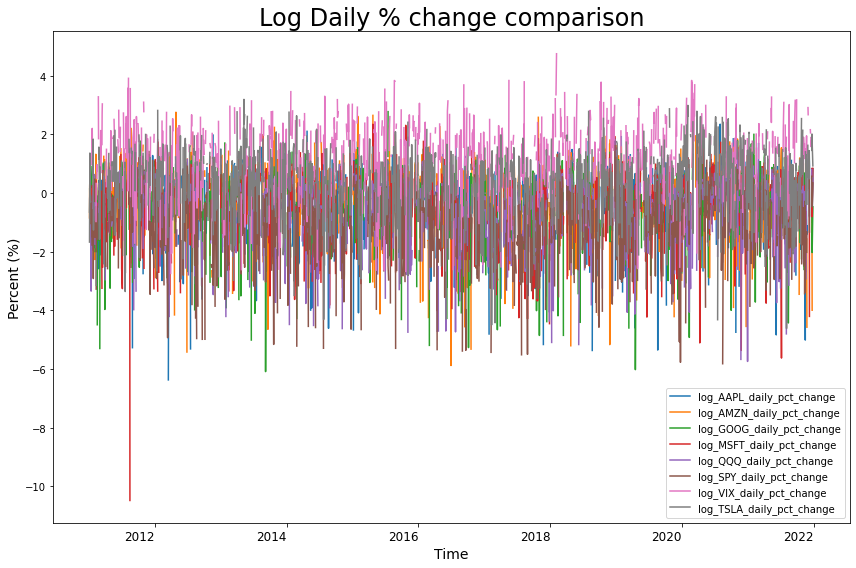

In [57]:
# Log % Change
df.plot(y = ['log_AAPL_daily_pct_change', 'log_AMZN_daily_pct_change', 'log_GOOG_daily_pct_change', 'log_MSFT_daily_pct_change',
             'log_QQQ_daily_pct_change', 'log_SPY_daily_pct_change', 'log_VIX_daily_pct_change', 'log_TSLA_daily_pct_change'], figsize=(12,8))

plt.title('Log Daily % change comparison', size=24)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Percent (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

plt.tight_layout()

# Export the image
plt.savefig('./images/log_daily_pct_change_comparison.png');

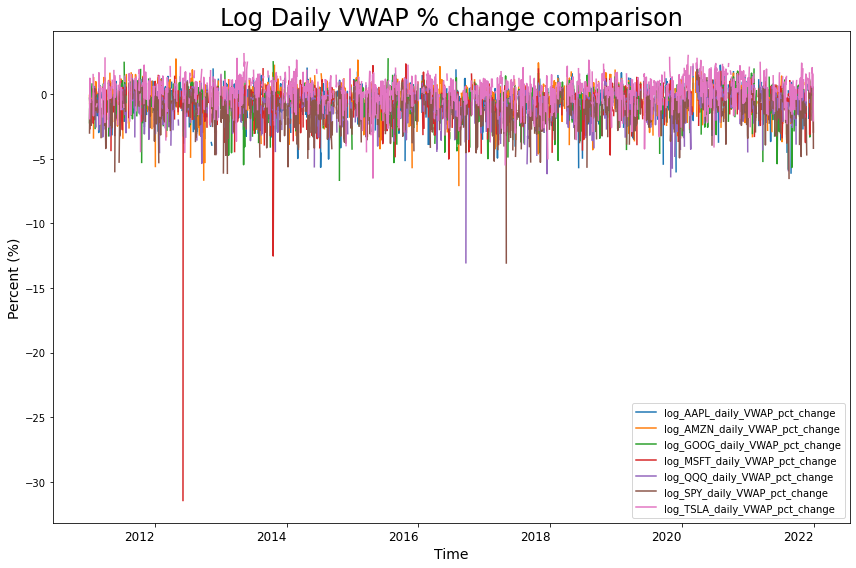

In [58]:
# Log VWAP % Change
df.plot(y = ['log_AAPL_daily_VWAP_pct_change', 'log_AMZN_daily_VWAP_pct_change', 'log_GOOG_daily_VWAP_pct_change', 'log_MSFT_daily_VWAP_pct_change',
             'log_QQQ_daily_VWAP_pct_change', 'log_SPY_daily_VWAP_pct_change', 'log_TSLA_daily_VWAP_pct_change'], figsize=(12,8))

plt.title('Log Daily VWAP % change comparison', size=24)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Percent (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

plt.tight_layout()

# Export the image
plt.savefig('./images/log_daily_VWAP_pct_change_comparison.png');

Daily adjusted prices and VWAPs were log transformed to compare percentage changes of each stocks in conjunction. Based on the graphs, there seems to be a similarity in the trend, though hard to distinguish in the plot. There are noticeable downward peaks. It would be interesting to investigate historical econimical event preceeding the sudden spikes as a next step. 

### Histogram of Daily % Changes (Returns)

#### Daily % Change - Adjusted Closing Price

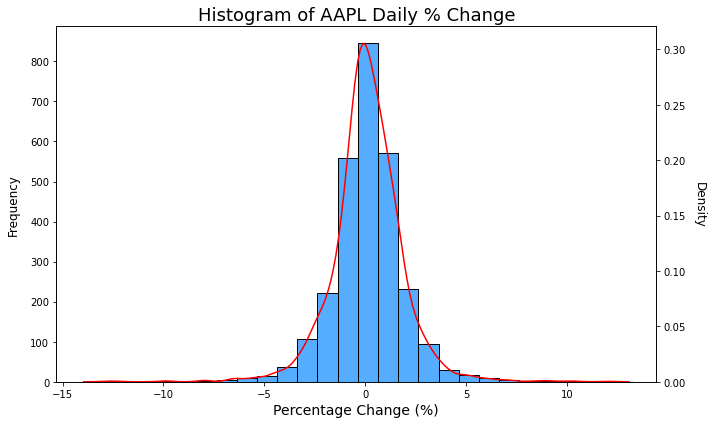

In [59]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['AAPL_daily_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['AAPL_daily_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of AAPL Daily % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/AAPL_hist_pct_change.png');

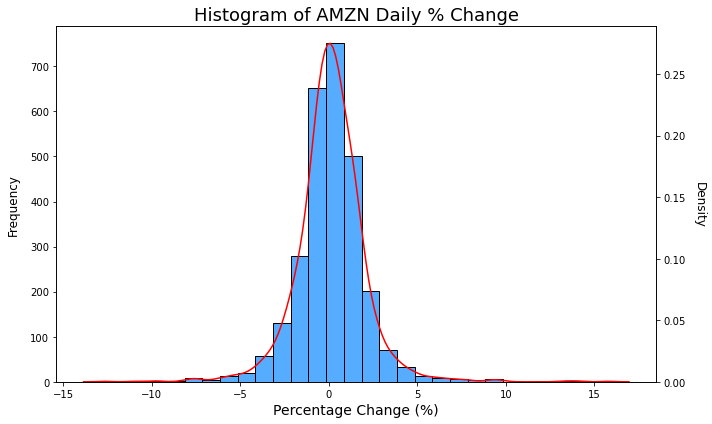

In [60]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['AMZN_daily_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['AMZN_daily_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of AMZN Daily % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/AMZN_hist_pct_change.png');

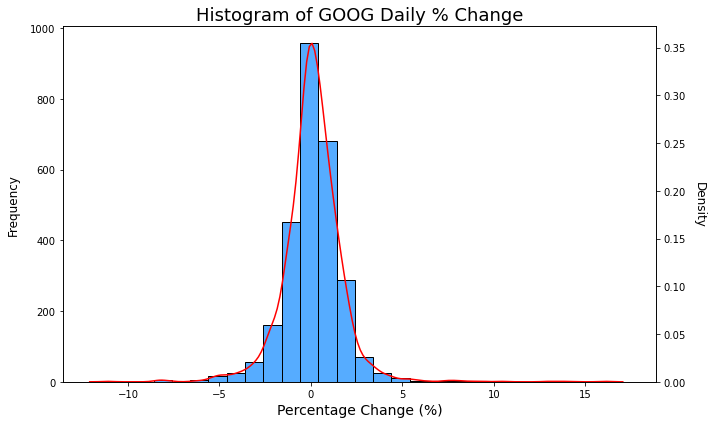

In [61]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['GOOG_daily_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['GOOG_daily_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of GOOG Daily % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/GOOG_hist_pct_change.png');

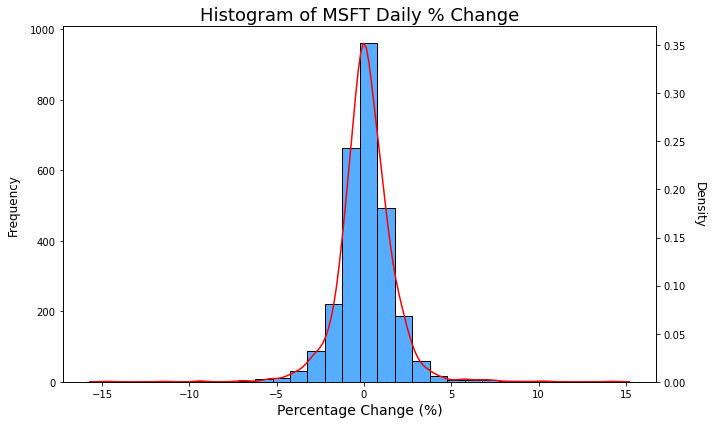

In [62]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['MSFT_daily_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['MSFT_daily_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of MSFT Daily % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/MSFT_hist_pct_change.png');

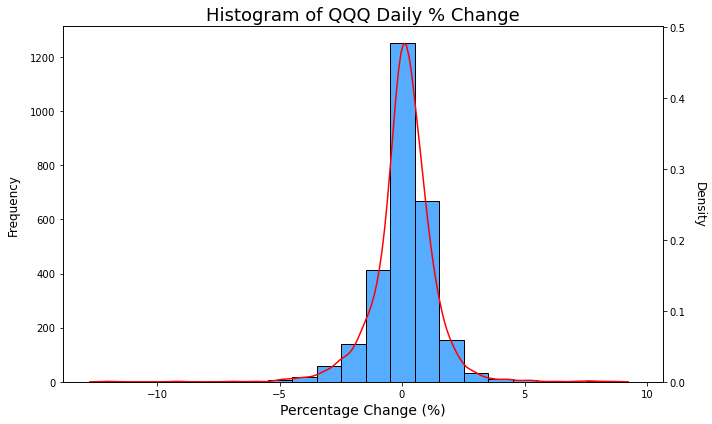

In [63]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['QQQ_daily_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['QQQ_daily_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of QQQ Daily % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/QQQ_hist_pct_change.png');

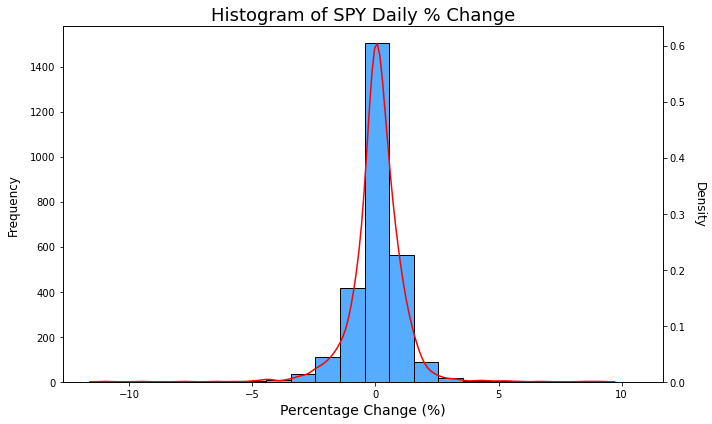

In [64]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['SPY_daily_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['SPY_daily_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of SPY Daily % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/SPY_hist_pct_change.png');

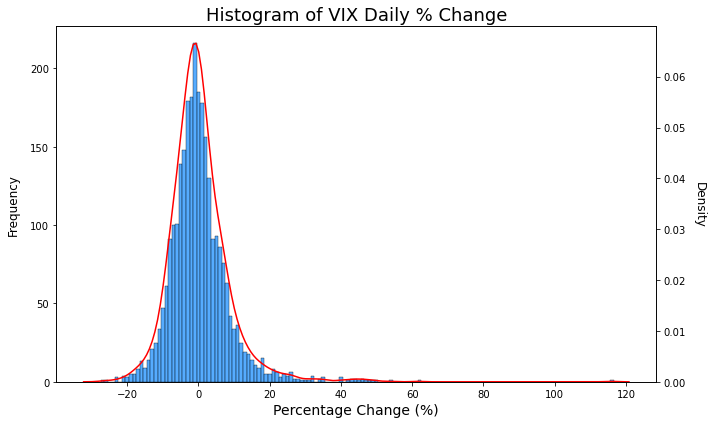

In [65]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['VIX_daily_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['VIX_daily_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of VIX Daily % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/VIX_hist_pct_change.png');

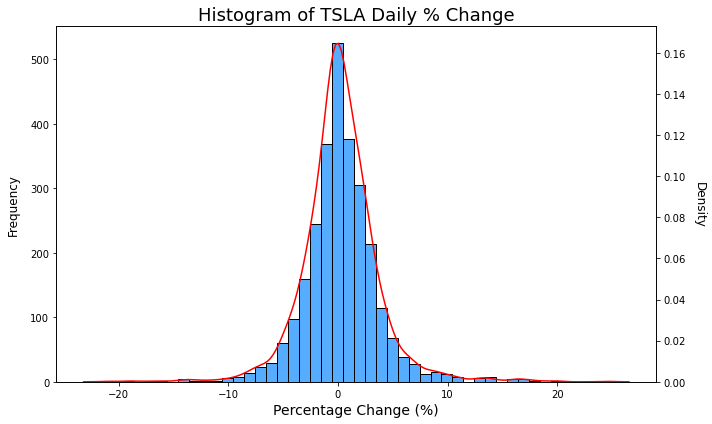

In [66]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['TSLA_daily_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['TSLA_daily_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of TSLA Daily % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/TSLA_hist_pct_change.png');

#### Daily % Change - VWAP
Again, VIX does not have trading volume, VIX would not have VWAP. 

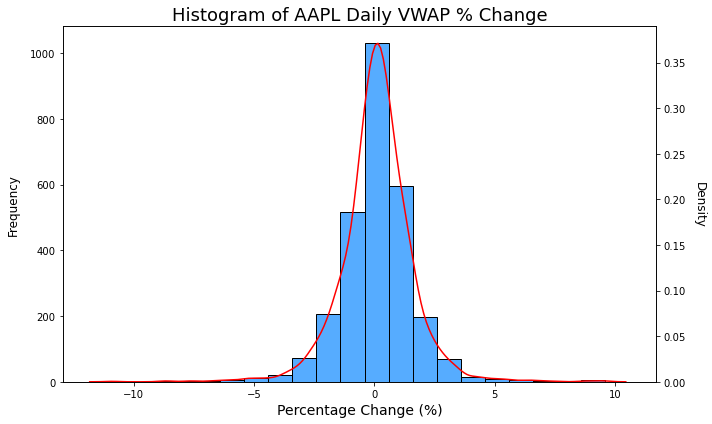

In [67]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['AAPL_daily_VWAP_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['AAPL_daily_VWAP_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of AAPL Daily VWAP % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/AAPL_hist__VWAP_pct_change.png');

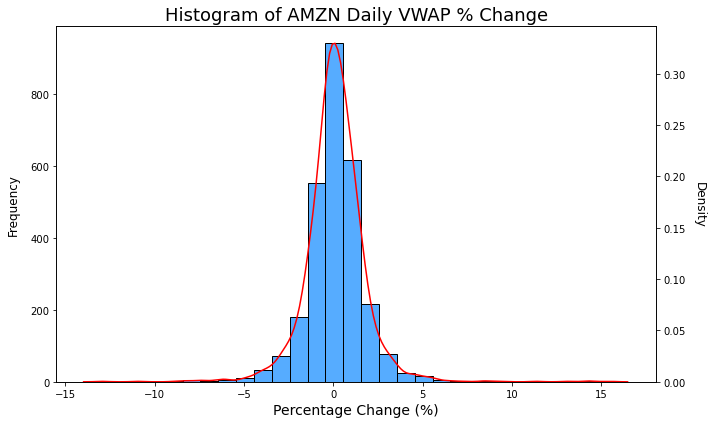

In [68]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['AMZN_daily_VWAP_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['AMZN_daily_VWAP_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of AMZN Daily VWAP % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/AMZN_hist__VWAP_pct_change.png');

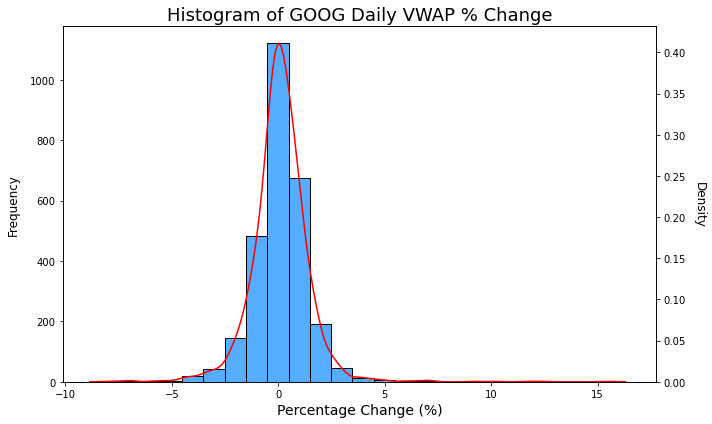

In [69]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['GOOG_daily_VWAP_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['GOOG_daily_VWAP_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of GOOG Daily VWAP % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/GOOG_hist__VWAP_pct_change.png');

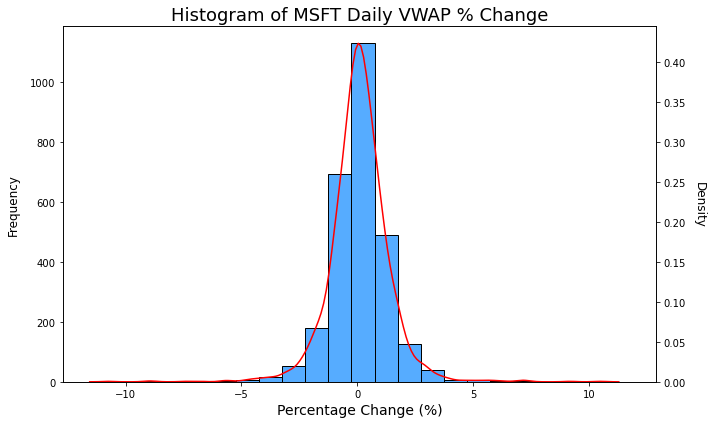

In [70]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['MSFT_daily_VWAP_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['MSFT_daily_VWAP_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of MSFT Daily VWAP % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/MSFT_hist__VWAP_pct_change.png');

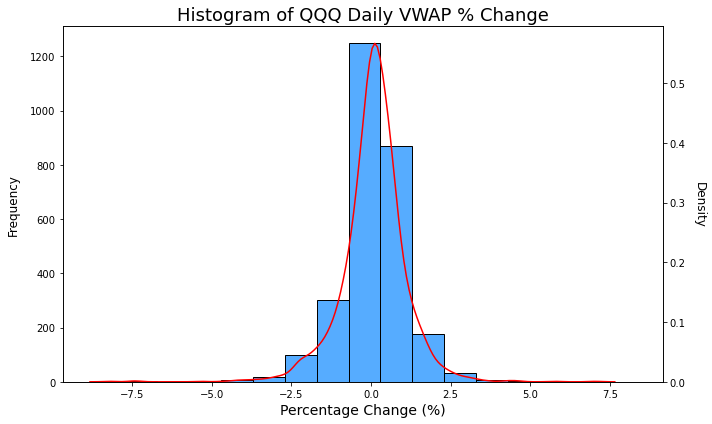

In [71]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['QQQ_daily_VWAP_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['QQQ_daily_VWAP_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of QQQ Daily VWAP % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/QQQ_hist__VWAP_pct_change.png');

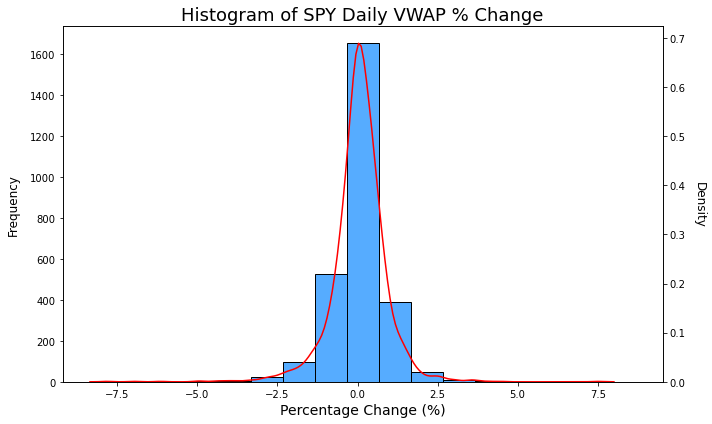

In [72]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['SPY_daily_VWAP_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['SPY_daily_VWAP_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of SPY Daily VWAP % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/SPY_hist__VWAP_pct_change.png');

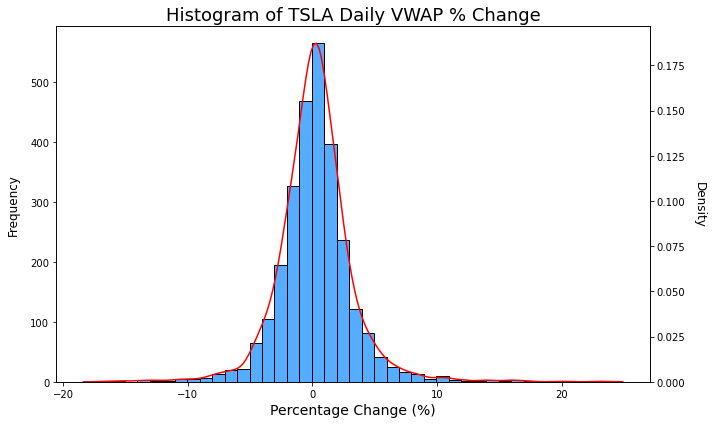

In [73]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Histogram
sns.histplot(data = df['TSLA_daily_VWAP_pct_change'], discrete=True, ax=ax1, color='dodgerblue')
# KDE Plot
ax2 = ax1.twinx()
sns.kdeplot(data = df['TSLA_daily_VWAP_pct_change'], ax=ax2, color='red')
# Title
plt.title('Histogram of TSLA Daily VWAP % Change', fontsize=18)
# Labels - X & Y axes
ax1.set_xlabel('Percentage Change (%)', size=14)
ax1.set_ylabel('Frequency', size=12, labelpad=10)
ax2.set_ylabel('Density', size=12, rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('./images/TSLA_hist__VWAP_pct_change.png');

#### KDE for Daily % Changes

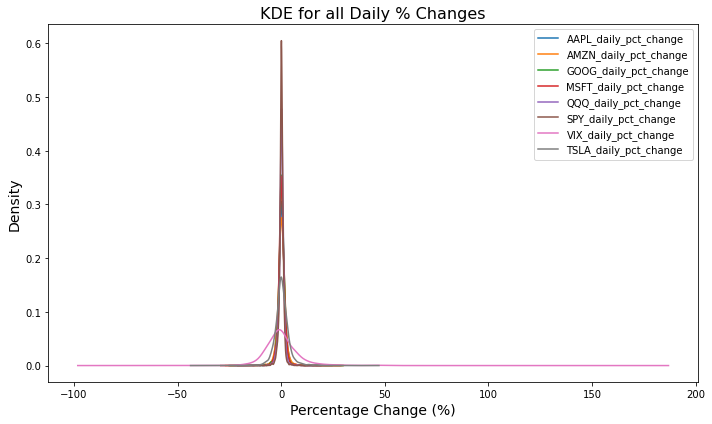

In [74]:
df[['AAPL_daily_pct_change', 'AMZN_daily_pct_change', 'GOOG_daily_pct_change', 'MSFT_daily_pct_change', 
    'QQQ_daily_pct_change', 'SPY_daily_pct_change', 'VIX_daily_pct_change', 'TSLA_daily_pct_change']].plot.kde(figsize=(10,6))
plt.title('KDE for all Daily % Changes', size=16)
plt.xlabel('Percentage Change (%)', size=14)
plt.ylabel('Density', size=14)

plt.tight_layout()
plt.savefig('./images/KDE_daily_pct_change.png');

#### KDE for Daily VWAP % Changes

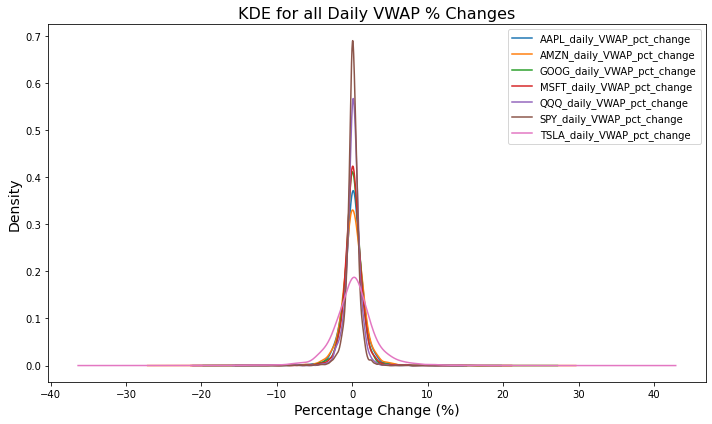

In [75]:
df[['AAPL_daily_VWAP_pct_change', 'AMZN_daily_VWAP_pct_change', 'GOOG_daily_VWAP_pct_change', 'MSFT_daily_VWAP_pct_change', 
    'QQQ_daily_VWAP_pct_change', 'SPY_daily_VWAP_pct_change', 'TSLA_daily_VWAP_pct_change']].plot.kde(figsize=(10,6))
plt.title('KDE for all Daily VWAP % Changes', size=16)
plt.xlabel('Percentage Change (%)', size=14)
plt.ylabel('Density', size=14)

plt.tight_layout()
plt.savefig('./images/KDE_daily_VWAP_pct_change.png');

### Correlations

#### Adjusted Closing Price Correlations

In [76]:
df[['Adj_Close_AAPL', 'Adj_Close_AMZN', 'Adj_Close_GOOG', 'Adj_Close_MSFT', 'Adj_Close_QQQ', 'Adj_Close_SPY', 'Adj_Close_TSLA', 'Adj_Close_VIX']].corr()

,Adj_Close_AAPL,Adj_Close_AMZN,Adj_Close_GOOG,Adj_Close_MSFT,Adj_Close_QQQ,Adj_Close_SPY,Adj_Close_TSLA,Adj_Close_VIX
Adj_Close_AAPL,1.000000,0.958262,0.962189,0.984767,0.983011,0.946483,0.929921,0.217397
Adj_Close_AMZN,0.958262,1.000000,0.948583,0.974757,0.979900,0.962015,0.823266,0.231727
Adj_Close_GOOG,0.962189,0.948583,1.000000,0.976765,0.985845,0.980231,0.887122,0.111428
Adj_Close_MSFT,0.984767,0.974757,0.976765,1.000000,0.990066,0.964993,0.891212,0.229261
Adj_Close_QQQ,0.983011,0.979900,0.985845,0.990066,1.000000,0.987506,0.885254,0.161972
Adj_Close_SPY,0.946483,0.962015,0.980231,0.964993,0.987506,1.000000,0.827823,0.074306
Adj_Close_TSLA,0.929921,0.823266,0.887122,0.891212,0.885254,0.827823,1.000000,0.178494
Adj_Close_VIX,0.217397,0.231727,0.111428,0.229261,0.161972,0.074306,0.178494,1.000000


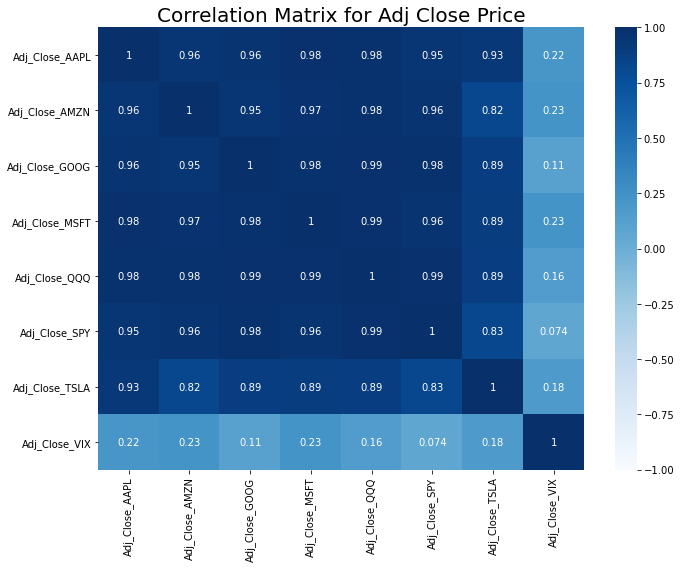

In [77]:
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix for Adj Close Price', fontsize=20)
sns.heatmap(df[['Adj_Close_AAPL', 'Adj_Close_AMZN', 'Adj_Close_GOOG', 'Adj_Close_MSFT', 'Adj_Close_QQQ', 'Adj_Close_SPY', 'Adj_Close_TSLA', 'Adj_Close_VIX']].corr(), 
            vmin=-1, vmax=1, annot=True, cmap='Blues')

plt.tight_layout()
plt.savefig('./images/corr_matrix_adj_close_price.png');

#### Log Adjusted Closing Price Correlation

In [78]:
df[['log_Adj_Close_AAPL', 'log_Adj_Close_AMZN', 'log_Adj_Close_GOOG', 'log_Adj_Close_MSFT', 'log_Adj_Close_QQQ', 'log_Adj_Close_SPY', 'log_Adj_Close_TSLA', 'log_Adj_Close_VIX']].corr()

,log_Adj_Close_AAPL,log_Adj_Close_AMZN,log_Adj_Close_GOOG,log_Adj_Close_MSFT,log_Adj_Close_QQQ,log_Adj_Close_SPY,log_Adj_Close_TSLA,log_Adj_Close_VIX
log_Adj_Close_AAPL,1.000000,0.949807,0.955634,0.979422,0.983150,0.964283,0.921330,0.154590
log_Adj_Close_AMZN,0.949807,1.000000,0.973032,0.981073,0.977884,0.969589,0.882642,0.113028
log_Adj_Close_GOOG,0.955634,0.973032,1.000000,0.977368,0.989165,0.991706,0.940465,0.032527
log_Adj_Close_MSFT,0.979422,0.981073,0.977368,1.000000,0.991479,0.979030,0.911128,0.151515
log_Adj_Close_QQQ,0.983150,0.977884,0.989165,0.991479,1.000000,0.994328,0.943788,0.085211
log_Adj_Close_SPY,0.964283,0.969589,0.991706,0.979030,0.994328,1.000000,0.943023,0.005526
log_Adj_Close_TSLA,0.921330,0.882642,0.940465,0.911128,0.943788,0.943023,1.000000,0.078557
log_Adj_Close_VIX,0.154590,0.113028,0.032527,0.151515,0.085211,0.005526,0.078557,1.000000


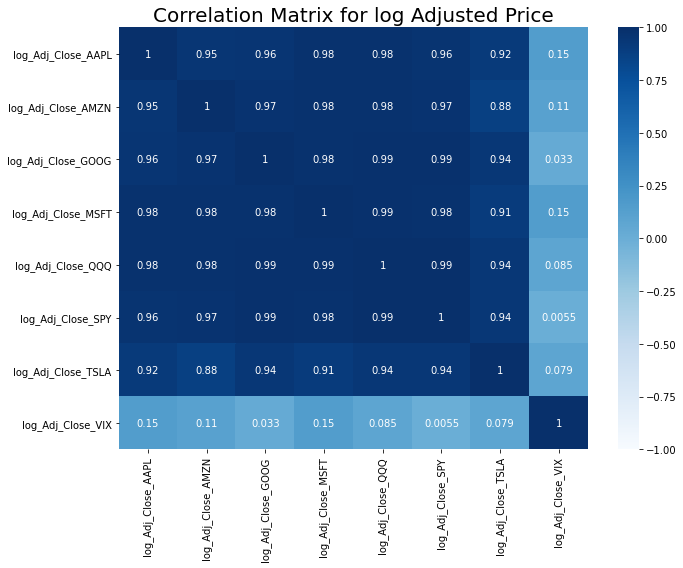

In [79]:
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix for log Adjusted Price', fontsize=20)
sns.heatmap(df[['log_Adj_Close_AAPL', 'log_Adj_Close_AMZN', 'log_Adj_Close_GOOG', 'log_Adj_Close_MSFT', 'log_Adj_Close_QQQ', 'log_Adj_Close_SPY', 'log_Adj_Close_TSLA', 'log_Adj_Close_VIX']].corr(), 
            vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.tight_layout()
plt.savefig('./images/corr_matrix_log_adj_close_price.png');

#### Daily % Change Correlations

In [80]:
df[['AAPL_daily_pct_change', 'AMZN_daily_pct_change', 'GOOG_daily_pct_change', 'MSFT_daily_pct_change', 'QQQ_daily_pct_change', 
   'SPY_daily_pct_change', 'TSLA_daily_pct_change', 'VIX_daily_pct_change']].corr()

,AAPL_daily_pct_change,AMZN_daily_pct_change,GOOG_daily_pct_change,MSFT_daily_pct_change,QQQ_daily_pct_change,SPY_daily_pct_change,TSLA_daily_pct_change,VIX_daily_pct_change
AAPL_daily_pct_change,1.000000,0.450207,0.523363,0.564522,0.766317,0.656052,0.328315,-0.483324
AMZN_daily_pct_change,0.450207,1.000000,0.572647,0.535128,0.681468,0.553471,0.323427,-0.453952
GOOG_daily_pct_change,0.523363,0.572647,1.000000,0.627366,0.760840,0.685438,0.320154,-0.545442
MSFT_daily_pct_change,0.564522,0.535128,0.627366,1.000000,0.815615,0.747882,0.341331,-0.558876
QQQ_daily_pct_change,0.766317,0.681468,0.760840,0.815615,1.000000,0.921853,0.474521,-0.714495
SPY_daily_pct_change,0.656052,0.553471,0.685438,0.747882,0.921853,1.000000,0.407632,-0.747458
TSLA_daily_pct_change,0.328315,0.323427,0.320154,0.341331,0.474521,0.407632,1.000000,-0.323325
VIX_daily_pct_change,-0.483324,-0.453952,-0.545442,-0.558876,-0.714495,-0.747458,-0.323325,1.000000


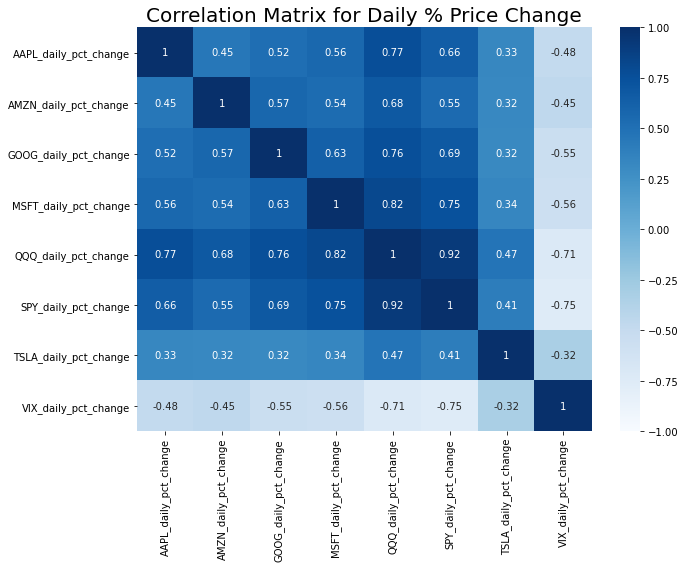

In [81]:
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix for Daily % Price Change', fontsize=20)
sns.heatmap(df[['AAPL_daily_pct_change', 'AMZN_daily_pct_change', 'GOOG_daily_pct_change', 'MSFT_daily_pct_change', 'QQQ_daily_pct_change', 
   'SPY_daily_pct_change', 'TSLA_daily_pct_change', 'VIX_daily_pct_change']].corr(),
            vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.tight_layout()
plt.savefig('./images/corr_matrix_daily_pct_change.png');

#### Daily VWAP % Change Correlations

In [82]:
df[['AAPL_daily_VWAP_pct_change', 'AMZN_daily_VWAP_pct_change', 'GOOG_daily_VWAP_pct_change', 'MSFT_daily_VWAP_pct_change', 'QQQ_daily_VWAP_pct_change', 
   'SPY_daily_VWAP_pct_change', 'TSLA_daily_VWAP_pct_change']].corr()

,AAPL_daily_VWAP_pct_change,AMZN_daily_VWAP_pct_change,GOOG_daily_VWAP_pct_change,MSFT_daily_VWAP_pct_change,QQQ_daily_VWAP_pct_change,SPY_daily_VWAP_pct_change,TSLA_daily_VWAP_pct_change
AAPL_daily_VWAP_pct_change,1.000000,0.403842,0.466731,0.493879,0.731547,0.605498,0.324702
AMZN_daily_VWAP_pct_change,0.403842,1.000000,0.533521,0.503396,0.653724,0.511807,0.313118
GOOG_daily_VWAP_pct_change,0.466731,0.533521,1.000000,0.566183,0.725343,0.641325,0.312427
MSFT_daily_VWAP_pct_change,0.493879,0.503396,0.566183,1.000000,0.768610,0.688280,0.334231
QQQ_daily_VWAP_pct_change,0.731547,0.653724,0.725343,0.768610,1.000000,0.902625,0.488653
SPY_daily_VWAP_pct_change,0.605498,0.511807,0.641325,0.688280,0.902625,1.000000,0.422248
TSLA_daily_VWAP_pct_change,0.324702,0.313118,0.312427,0.334231,0.488653,0.422248,1.000000


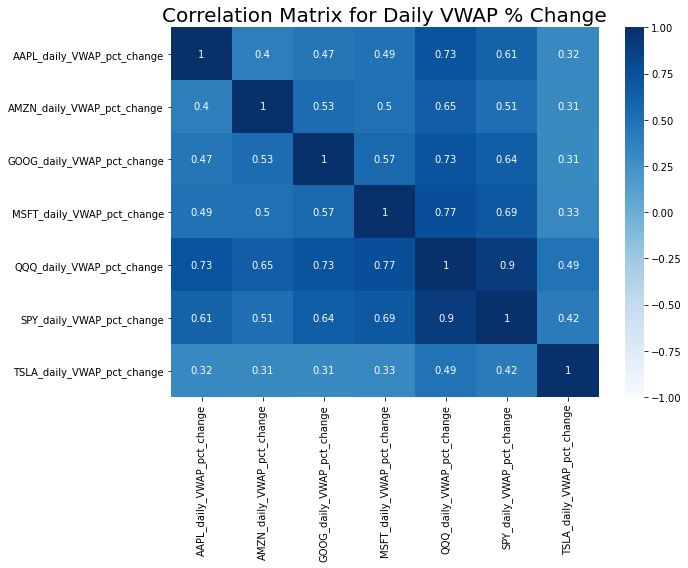

In [83]:
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix for Daily VWAP % Change', fontsize=20)
sns.heatmap(df[['AAPL_daily_VWAP_pct_change', 'AMZN_daily_VWAP_pct_change', 'GOOG_daily_VWAP_pct_change', 'MSFT_daily_VWAP_pct_change', 'QQQ_daily_VWAP_pct_change', 
   'SPY_daily_VWAP_pct_change', 'TSLA_daily_VWAP_pct_change']].corr(),
            vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.tight_layout()
plt.savefig('./images/corr_matrix_daily_VWAP_pct_change.png');

### Saving DataFrame to for Modeling

In [84]:
df.to_csv('./data/post_EDA_df.csv')